In [1]:
import simpy, random
from queue_simulation2b import ServiceOperation, SIMULATION_DURATION, SEED

In [2]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Initializing OpenUp Queue Simulation')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

random.seed(SEED) # comment out line if not reproducing results
queue_status = []
max_queue_length = []
num_helpseekers = []
num_helpseekers_accepted_TOS = []
num_helpseekers_rejected_TOS = []
num_helpseekers_served = []
num_helpseekers_served_g_regular = []
num_helpseekers_served_g_repeated = []
num_helpseekers_reneged = []
# num_helpseekers_reneged_g_regular = []
# num_helpseekers_reneged_g_repeated = []
num_available_counsellor_processes = []
queue_time_stats = []
renege_time_stats = []
    
for i in range(1, 2):
    # create environment
    env = simpy.Environment() 

    # set up service operation and run simulation until  
    S = ServiceOperation(env=env)
    env.run(until=SIMULATION_DURATION)

#     print(f'Iteration #{i} ')
      
    num_helpseekers.append(S.num_helpseekers)
    num_helpseekers_accepted_TOS.append(S.num_helpseekers_TOS_accepted)
    num_helpseekers_rejected_TOS.append(S.num_helpseekers_TOS_rejected)
    max_queue_length.append(S.helpseeker_queue_max_length)
    queue_status.extend(S.queue_status)
    num_available_counsellor_processes.extend(S.num_available_counsellor_processes)
    num_helpseekers_served.append(S.served)
    num_helpseekers_served_g_regular.append(S.served_g_regular)
    num_helpseekers_served_g_repeated.append(S.served_g_repeated)
    num_helpseekers_reneged.append(S.reneged)
    queue_time_stats.append(S.queue_time_stats)
    renege_time_stats.append(S.renege_time_stats)
#     num_helpseekers_reneged_g_regular.append(S.reneged_g_regular)
#     num_helpseekers_reneged_g_repeated.append(S.reneged_g_repeated)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initializing OpenUp Queue Simulation
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
sns.set();

In [5]:
num_helpseekers = pd.Series(num_helpseekers, name='number of helpseekers')
num_helpseekers_accepted_TOS = pd.Series(num_helpseekers_accepted_TOS, name='number of helpseekers accepted TOS')
num_helpseekers_rejected_TOS = pd.Series(num_helpseekers_rejected_TOS, name='number of helpseekers rejected TOS')
num_helpseekers_served = pd.Series(num_helpseekers_served, name='number of helpseekers served')
num_helpseekers_served_g_regular = pd.Series(num_helpseekers_served_g_regular, name='number of users served')
num_helpseekers_served_g_repeated = pd.Series(num_helpseekers_served_g_repeated, name='number of repeated users served')
num_helpseekers_reneged = pd.Series(num_helpseekers_reneged, name='number of helpseekers reneged')
# num_helpseekers_reneged_g_regular = pd.Series(num_helpseekers_reneged_g_regular, name='number of users reneged')
# num_helpseekers_reneged_g_repeated = pd.Series(num_helpseekers_reneged_g_repeated, name='number of repeated users reneged')
# queue_status = pd.Series(queue_status, name='number of instances queue exceeded four helpseekers')
max_queue_length = pd.Series(max_queue_length, name='max queue length')

In [6]:
# function to calculate classification confidence intervals
# parameter: stats - list of confidence intervals, which must be ordered
#            metadata - any string to annotate printout, can be None
# precondition - metadata must be a string or None, and stats must be a list
#                  The check is commented out for now as asserts should 
#               be done outside function
# returns: cutoff values at 2.5% and 95% percentiles
def calculate_confidence_intervals(stats, metadata=None):
    # if not isinstance(metadata, None) or \
    #     not isinstance(metadata, str) or \
    #     not isinstance(stats, list):
    #     return
        
    confidence_interval = .95 # 95 percent confidence level
    q_lower = .5 * (1 - confidence_interval)
    q_upper = confidence_interval + q_lower
        
    # convert to percentages
    q_lower = q_lower * 100
    q_upper = q_upper * 100
    confidence_interval = confidence_interval * 100
        
    #     print(q_lower, q_upper)
    lower_percentile = np.percentile(stats, q_lower)
    upper_percentile = np.percentile(stats, q_upper)
    mean = np.mean(stats)
        
    print('\n%s %d%% Confidence interval:' % (
        metadata, confidence_interval) )
    print('----------------------------')
    print('%.1f%% percentile: %.5f' % (q_lower, lower_percentile) )
    print('%.1f%% percentile: %.5f\n' % (q_upper, upper_percentile) )
    print('mean value: %.5f' % mean)
    return (lower_percentile, upper_percentile, mean)

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_distribution(series, filename):
    confidence_interval = .95 # 95 percent confidence level
    q_lower = .5 * (1 - confidence_interval)
    q_upper = confidence_interval + q_lower
        
    # convert to percentages
    q_lower = q_lower * 100
    q_upper = q_upper * 100
    confidence_interval = confidence_interval * 100
        
    #     print(q_lower, q_upper)
    lower_percentile = np.percentile(series, q_lower)
    upper_percentile = np.percentile(series, q_upper)
    mean = np.mean(series)
    
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 5) )
    sns.distplot(series, ax=ax)
    ax.axvline(x=lower_percentile, linestyle='--' )
    ax.axvline(x=upper_percentile, linestyle='--' )
    ax.axvline(x=mean, linestyle=':', linewidth=2 )
    
    fig.savefig(f'{filename}.png', dpi=300, bbox_inches='tight')

/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


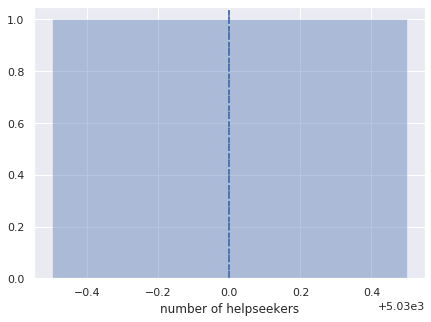

In [9]:
plot_distribution(num_helpseekers, 'num_helpseekers')

In [10]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 5030.00000
97.5% percentile: 5030.00000

mean value: 5030.00000


/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


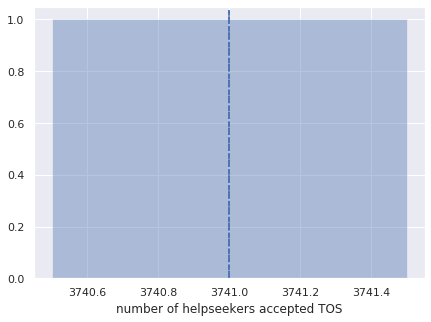

In [11]:
plot_distribution(num_helpseekers_accepted_TOS, 'num_helpseekers_accepted_TOS')

In [12]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_accepted_TOS.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 3741.00000
97.5% percentile: 3741.00000

mean value: 3741.00000


/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


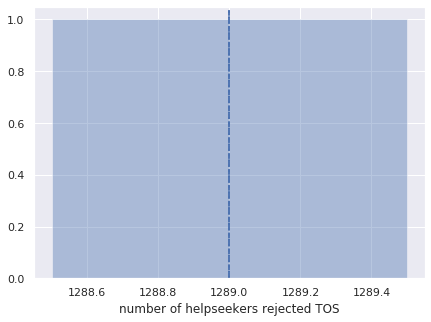

In [13]:
plot_distribution(num_helpseekers_rejected_TOS, 'num_helpseekers_rejected_TOS')

In [14]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_rejected_TOS.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 1289.00000
97.5% percentile: 1289.00000

mean value: 1289.00000


/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


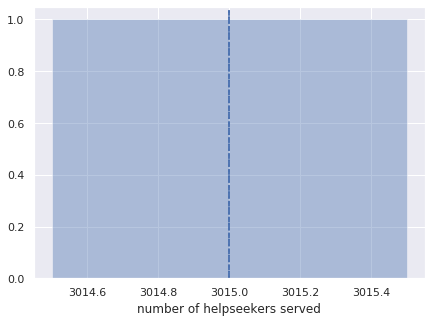

In [15]:
plot_distribution(num_helpseekers_served, 'num_helpseekers_served')

In [16]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_served.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 3015.00000
97.5% percentile: 3015.00000

mean value: 3015.00000


/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


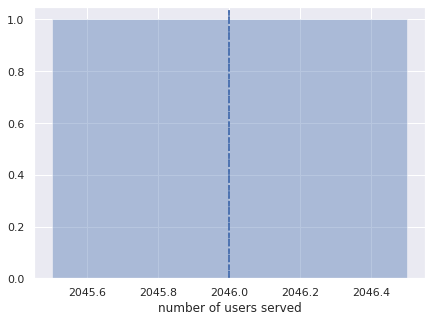

In [17]:
plot_distribution(num_helpseekers_served_g_regular, 'num_helpseekers_served_g_regular')

In [18]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_served_g_regular.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 2046.00000
97.5% percentile: 2046.00000

mean value: 2046.00000


/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


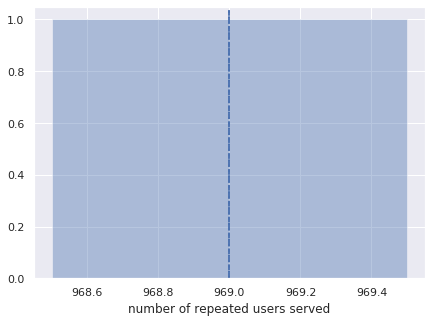

In [19]:
plot_distribution(num_helpseekers_served_g_repeated, 'num_helpseekers_served_g_repeated')

In [20]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_served_g_repeated.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 969.00000
97.5% percentile: 969.00000

mean value: 969.00000


/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/plbchiang/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


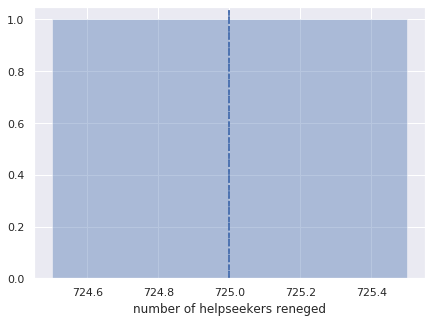

In [21]:
plot_distribution(num_helpseekers_reneged, 'num_helpseekers_reneged')

In [22]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_reneged.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 725.00000
97.5% percentile: 725.00000

mean value: 725.00000


In [23]:
# plot_distribution(num_helpseekers_reneged_g_regular, 'num_helpseekers_reneged_g_regular')

In [24]:
# lower, upper, mean = calculate_confidence_intervals(
#     num_helpseekers_reneged_g_regular.sort_values().to_list() )

In [25]:
# plot_distribution(num_helpseekers_reneged_g_repeated, 'num_helpseekers_reneged_g_repeated')

In [26]:
# lower, upper, mean = calculate_confidence_intervals(
#     num_helpseekers_reneged_g_repeated.sort_values().to_list() )

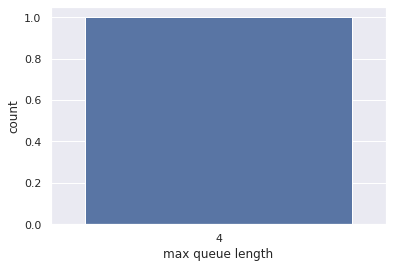

In [27]:
max_queue_length_count = sns.countplot(x='max queue length', data=max_queue_length.to_frame())

max_queue_length_count.get_figure().savefig(f'max_queue_length_count.png', dpi=300, bbox_inches='tight')

In [28]:
queue_status = pd.DataFrame(queue_status, columns=['day_of_week', 'hour', 'queue_length'])

In [29]:
queue_status['hour'] = queue_status['hour'].str.replace('hour:', '').astype(int)

In [30]:
queue_status['day_of_week'].replace({
    'weekday:0': 'Sunday',
    'weekday:1': 'Monday',
    'weekday:2': 'Tuesday',
    'weekday:3': 'Wednesday',
    'weekday:4': 'Thursday',
    'weekday:5': 'Friday',
    'weekday:6': 'Saturday'
}, inplace=True)

In [31]:
queue_status['queue_length'] = queue_status['queue_length'].str.replace('queue_length:', '').astype(int)

In [32]:
queue_status

,day_of_week,hour,queue_length
0,Sunday,0,0
1,Sunday,0,0
2,Sunday,0,0
3,Sunday,0,0
4,Sunday,0,0
...,...,...,...
3736,Monday,23,0
3737,Monday,23,0
3738,Monday,23,0
3739,Monday,23,1


In [33]:
queue_status['total']=1

In [34]:
totals = queue_status.groupby(
    ['day_of_week', 'hour', 'queue_length']).sum()

In [35]:
totals = totals.reset_index()

In [36]:
totals

,day_of_week,hour,queue_length,total
0,Friday,0,0,41
1,Friday,1,0,30
2,Friday,2,0,22
3,Friday,3,0,16
4,Friday,4,0,8
...,...,...,...,...
211,Wednesday,22,1,11
212,Wednesday,22,2,1
213,Wednesday,23,0,24
214,Wednesday,23,1,8


In [37]:
totals = pd.pivot_table(totals, values='total', columns=['queue_length'],
              index=['day_of_week', 'hour'], aggfunc=np.sum, fill_value=0)

In [38]:
totals_percent = (((totals.T/totals.T.sum()).T)*100)#.round(2)

totals_percent

In [39]:
totals_percent

queue_length               0          1         2    3    4
day_of_week hour                                           
Friday      0     100.000000   0.000000  0.000000  0.0  0.0
            1     100.000000   0.000000  0.000000  0.0  0.0
            2     100.000000   0.000000  0.000000  0.0  0.0
            3     100.000000   0.000000  0.000000  0.0  0.0
            4     100.000000   0.000000  0.000000  0.0  0.0
...                      ...        ...       ...  ...  ...
Wednesday   19    100.000000   0.000000  0.000000  0.0  0.0
            20    100.000000   0.000000  0.000000  0.0  0.0
            21     68.888889  26.666667  4.444444  0.0  0.0
            22     73.913043  23.913043  2.173913  0.0  0.0
            23     72.727273  24.242424  3.030303  0.0  0.0

[168 rows x 5 columns]

In [40]:
totals_percent2 = totals_percent.reset_index()

In [41]:
totals_percent2['day_int'] = totals_percent2['day_of_week'].map({
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4
})

In [42]:
totals_percent2 = totals_percent2.sort_values(
    by=['day_int', 'hour']).reset_index(drop=True).set_index(
    ['day_of_week', 'hour']).drop(columns=['day_int'])

In [43]:
totals_percent2

queue_length               0          1         2         3    4
day_of_week hour                                                
Sunday      0     100.000000   0.000000  0.000000  0.000000  0.0
            1     100.000000   0.000000  0.000000  0.000000  0.0
            2     100.000000   0.000000  0.000000  0.000000  0.0
            3     100.000000   0.000000  0.000000  0.000000  0.0
            4     100.000000   0.000000  0.000000  0.000000  0.0
...                      ...        ...       ...       ...  ...
Saturday    19    100.000000   0.000000  0.000000  0.000000  0.0
            20    100.000000   0.000000  0.000000  0.000000  0.0
            21     80.000000  20.000000  0.000000  0.000000  0.0
            22     69.696970  21.212121  6.060606  3.030303  0.0
            23     72.972973  18.918919  8.108108  0.000000  0.0

[168 rows x 5 columns]

In [44]:
totals_percent2['2_or_above'] = 0
for i in totals_percent2.columns[2:]:
    totals_percent2['2_or_above'] += totals_percent2[i]

In [45]:
totals_percent2.reset_index(inplace=True)

In [46]:
totals_percent2['new_ind'] = totals_percent2['day_of_week'] + '_'+ totals_percent2['hour'].astype(str)

In [47]:
totals_percent3 = totals_percent2.set_index('new_ind')[[0, 1, '2_or_above']].copy()

In [48]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

# modify matplotlib and seaborn settings
# to display Chinese 
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['font.weight'] = 'medium'

sns.set(font=['sans-serif'])
sns.set_style('dark',{'font.sans-serif':['Noto Serif CJK JP']})
sns.set_context('talk')

In [49]:
# fig, ax = plt.subplots(figsize=(10, 100) )


# sns.heatmap(totals_percent, annot=True, ax=ax, annot_kws={"size": 12}, 
#     cmap=sns.diverging_palette(220, 10, sep=80, n=255)
# );
# fig.suptitle('Queue Length Probabilities by\nthe day of the week and hour\n'
#              '#Social Worker(s) × #sim chats max: 2 × 4,\n'
#              '#Duty Officer(s) × #sim chats max: 1 × 1,\n'
#              '#Volunteer(s) × #sim chats max: 2 × 1',
#     fontsize=24, weight='heavy',
#     fontweight=1000, y=.9)
# plt.subplots_adjust(bottom=0.2)

# # workaround from https://github.com/mwaskom/seaborn/issues/1773
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show() # ta-da!

# fig.savefig(f'queue_output/Queue_SW_24_DO_11_V_21.png', dpi=300, bbox_inches='tight')

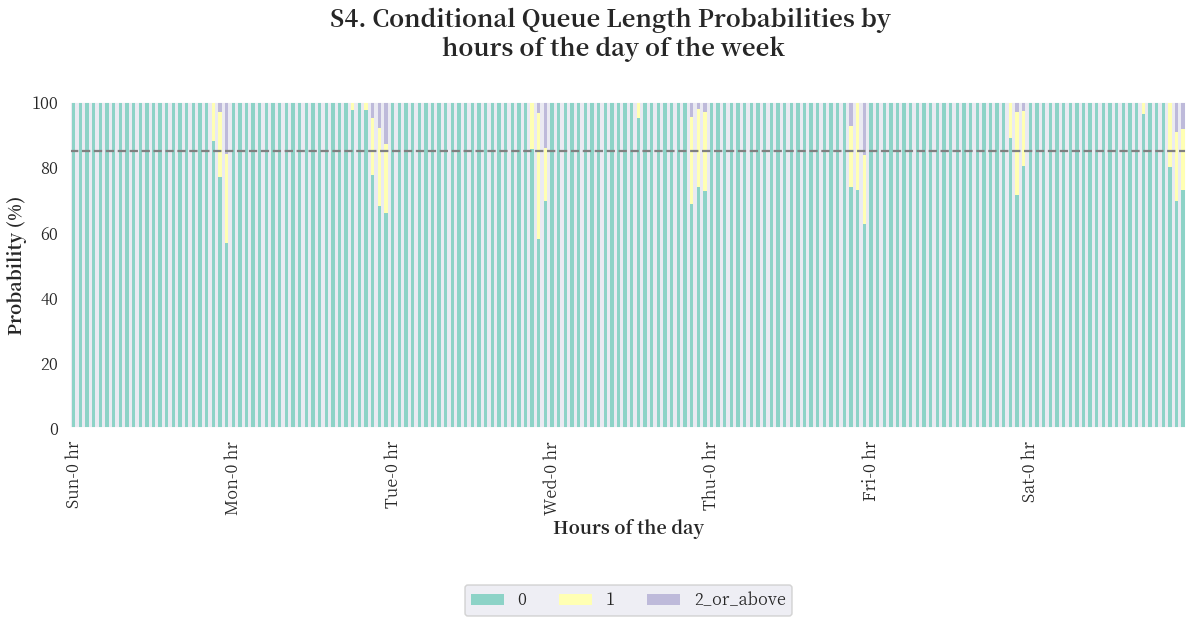

In [50]:
fig, ax = plt.subplots(figsize=(20,6) )
palette = sns.color_palette("Set3")

fig.suptitle('S4. Conditional Queue Length Probabilities by\n hours of the day of the week',
    fontsize=24, weight='heavy',
    fontweight=1000, y=1.1)

totals_percent3.plot.bar(
    stacked=True,
    ax=ax,
    linewidth=.01,
    color=palette
)

ax.axhline(y=85, linestyle='--', color='grey')
ax.set_xticklabels(labels=[f'{x[:3]}-{x[-1]} hr' 
    if x[-2:] == '_0' else ''
    for x in totals_percent3.index])

ax.set_xlabel('Hours of the day')
ax.set_ylabel('Probability (%)')



ax.set_ylim(0,100)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.6), ncol=3)
fig.savefig(f'queue_output/Queue_SW_2434_DO_11_V_2423-45.png', dpi=300, bbox_inches='tight')

In [51]:
# queue_plot = sns.catplot(col='day_of_week', y='hour', col_wrap=4,
#     col_order=['Sunday',
#         'Monday',
#         'Tuesday',
#         'Wednesday',
#         'Thursday',
#         'Friday',
#         'Saturday'],
#     data=queue_status, kind="count",
#     height=4, aspect=1);
# queue_plot.savefig(f'queue_blowup.png', dpi=300, bbox_inches='tight')

In [52]:
queue_time_stats[0]

[('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:1', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:1', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:1', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:1', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:1', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:1', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:2', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:2', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:2', 'time_spent_in_queue:

In [53]:
queue_time_stats = pd.DataFrame(queue_time_stats[0], columns=['day_of_week', 'hour', 'queue_time'])

In [54]:
queue_time_stats['hour'] = queue_time_stats['hour'].str.replace('hour:', '').astype(int)

In [55]:
queue_time_stats['day_of_week'].replace({
    'weekday:0': 'Sunday',
    'weekday:1': 'Monday',
    'weekday:2': 'Tuesday',
    'weekday:3': 'Wednesday',
    'weekday:4': 'Thursday',
    'weekday:5': 'Friday',
    'weekday:6': 'Saturday'
}, inplace=True)

In [56]:
queue_time_stats

,day_of_week,hour,queue_time
0,Sunday,0,time_spent_in_queue:0.0
1,Sunday,0,time_spent_in_queue:0.0
2,Sunday,0,time_spent_in_queue:0.0
3,Sunday,0,time_spent_in_queue:0.0
4,Sunday,0,time_spent_in_queue:0.0
...,...,...,...
3011,Monday,21,time_spent_in_queue:0.0
3012,Monday,21,time_spent_in_queue:0.0
3013,Monday,21,time_spent_in_queue:0.0
3014,Monday,21,time_spent_in_queue:0.0


In [57]:
queue_time_stats['queue_time'] = queue_time_stats['queue_time'].str.replace(
    'time_spent_in_queue:', '').astype(float)

In [58]:
queue_time_stats

,day_of_week,hour,queue_time
0,Sunday,0,0.0
1,Sunday,0,0.0
2,Sunday,0,0.0
3,Sunday,0,0.0
4,Sunday,0,0.0
...,...,...,...
3011,Monday,21,0.0
3012,Monday,21,0.0
3013,Monday,21,0.0
3014,Monday,21,0.0


In [59]:
queue_time_stats['total']=1

In [60]:
# totals = 
queue_time_stats.mean()

hour          10.645225
queue_time     0.010268
total          1.000000
dtype: float64

In [61]:
queue_time_stats['queue_time_group'] = queue_time_stats['queue_time'].apply(lambda x: '<=5 minutes' if x<=5 else '>5 minutes')

In [62]:
queue_time_stats['queue_time_group']

0       <=5 minutes
1       <=5 minutes
2       <=5 minutes
3       <=5 minutes
4       <=5 minutes
           ...     
3011    <=5 minutes
3012    <=5 minutes
3013    <=5 minutes
3014    <=5 minutes
3015    <=5 minutes
Name: queue_time_group, Length: 3016, dtype: object

In [63]:
queue_time_stats = pd.pivot_table(queue_time_stats, values='total', columns=['queue_time_group'],
              index=['day_of_week', 'hour'], aggfunc=np.sum, fill_value=0)

In [64]:
queue_time_stats

queue_time_group  <=5 minutes  >5 minutes
day_of_week hour                         
Friday      0              41           0
            1              30           0
            2              22           0
            3              16           0
            4               8           0
...                       ...         ...
Wednesday   17             27           0
            18             19           0
            19             18           0
            20             21           0
            21             22           0

[154 rows x 2 columns]

In [65]:
queue_time_stats_percent = (((queue_time_stats.T/queue_time_stats.T.sum()).T)*100)#.round(2)

In [66]:
queue_time_stats

queue_time_group  <=5 minutes  >5 minutes
day_of_week hour                         
Friday      0              41           0
            1              30           0
            2              22           0
            3              16           0
            4               8           0
...                       ...         ...
Wednesday   17             27           0
            18             19           0
            19             18           0
            20             21           0
            21             22           0

[154 rows x 2 columns]

In [67]:
queue_time_stats2 = queue_time_stats_percent.reset_index()

In [68]:
queue_time_stats2['day_int'] = queue_time_stats2['day_of_week'].map({
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4
})

In [69]:
queue_time_stats2 = queue_time_stats2.sort_values(
    by=['day_int', 'hour']).reset_index(drop=True).set_index(
    ['day_of_week', 'hour']).drop(columns=['day_int'])

In [70]:
queue_time_stats2

queue_time_group  <=5 minutes  >5 minutes
day_of_week hour                         
Sunday      0           100.0         0.0
            1           100.0         0.0
            2           100.0         0.0
            3           100.0         0.0
            4           100.0         0.0
...                       ...         ...
Saturday    17          100.0         0.0
            18          100.0         0.0
            19          100.0         0.0
            20          100.0         0.0
            21          100.0         0.0

[154 rows x 2 columns]

In [71]:
queue_time_stats2.reset_index(inplace=True)

In [72]:
queue_time_stats2['new_ind'] = queue_time_stats2['day_of_week'] + '_'+ queue_time_stats2['hour'].astype(str)

In [73]:
queue_time_stats3 = queue_time_stats2.set_index('new_ind')[['<=5 minutes', '>5 minutes']].copy()

In [74]:
queue_time_stats3

queue_time_group,<=5 minutes,>5 minutes
new_ind,,
Sunday_0,100.0,0.0
Sunday_1,100.0,0.0
Sunday_2,100.0,0.0
Sunday_3,100.0,0.0
Sunday_4,100.0,0.0
...,...,...
Saturday_17,100.0,0.0
Saturday_18,100.0,0.0
Saturday_19,100.0,0.0


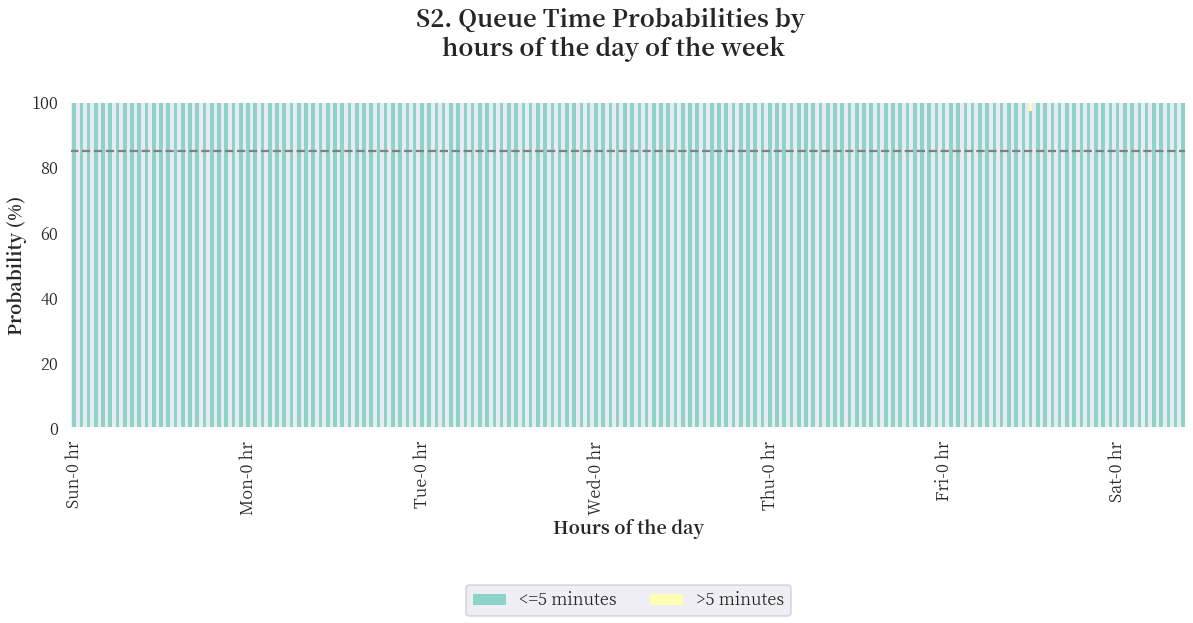

In [75]:
fig, ax = plt.subplots(figsize=(20,6) )
palette = sns.color_palette("Set3")

fig.suptitle('S2. Queue Time Probabilities by\n hours of the day of the week',
    fontsize=24, weight='heavy',
    fontweight=1000, y=1.1)

queue_time_stats3.plot.bar(
    stacked=True,
    ax=ax,
    linewidth=.01,
    color=palette
)

ax.axhline(y=85, linestyle='--', color='grey')
ax.set_xticklabels(labels=[f'{x[:3]}-{x[-1]} hr' 
    if x[-2:] == '_0' else ''
    for x in totals_percent3.index])

ax.set_xlabel('Hours of the day')
ax.set_ylabel('Probability (%)')



ax.set_ylim(0,100)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.6), ncol=2)
fig.savefig(f'queue_output/QueueTime_SW_2434_DO_11_V_2423-45.png', dpi=300, bbox_inches='tight')

# determine hours counsellors are maxed out

In [76]:
from queue_simulation import (
    MINUTES_PER_DAY, DAYS_IN_WEEK, MINUTES_PER_HOUR, 
    MAX_SIMULTANEOUS_CHATS_SOCIAL_WORKER,
    MAX_SIMULTANEOUS_CHATS_DUTY_OFFICER,
    MAX_SIMULTANEOUS_CHATS_VOLUNTEER,)

In [77]:
MAX_SIMULTANEOUS_CHATS_VOLUNTEER

1

In [78]:
MAX_SIMULTANEOUS_CHATS_DUTY_OFFICER

1

In [79]:
MAX_SIMULTANEOUS_CHATS_SOCIAL_WORKER

3

In [94]:
num_available_counsellor_processes

[(10.927214450571233, 24),
 (15.172662347716507, 23),
 (15.902338733939722, 22),
 (33.65060770855745, 21),
 (34.66132732087419, 20),
 (39.829465410816496, 19),
 (43.52284828325177, 18),
 (44.677939622871975, 17),
 (55.49992720481835, 18),
 (56.93315568359725, 17),
 (65.08358384761537, 6),
 (77.12505582256985, 6),
 (77.61647299424592, 5),
 (86.68699361887772, 5),
 (91.78786544432656, 5),
 (113.26622883600325, 6),
 (120.39296722965656, 5),
 (123.25278175325512, 4),
 (142.6704107074332, 4),
 (153.11774612333102, 5),
 (161.69059796930063, 4),
 (163.77884693134513, 3),
 (164.0671061403148, 2),
 (171.49222764766193, 2),
 (182.88669640204338, 4),
 (191.70419325896245, 5),
 (219.96168395562356, 8),
 (229.60672455691218, 8),
 (230.09150816851306, 7),
 (259.6014342915601, 8),
 (302.167396931887, 11),
 (311.975790102595, 10),
 (346.2244611407289, 10),
 (437.5300320426553, 19),
 (447.2028947661412, 18),
 (490.20785150653904, 6),
 (507.27516450943807, 5),
 (512.3205829189006, 4),
 (547.288539376426

In [80]:
df2 = pd.DataFrame(num_available_counsellor_processes, columns=['time', 'num_counsellor_processes_idle'])

In [81]:
df2['time_int'] = df2['time'].astype(int)

In [82]:
df2['current_day_minutes'] = df2['time_int'] % MINUTES_PER_DAY

In [83]:
df2['weekday'] = (df2['time_int'] / MINUTES_PER_DAY).astype(int) % DAYS_IN_WEEK

In [84]:
df2['hour'] = (df2['current_day_minutes'] / MINUTES_PER_HOUR).astype(int)

In [85]:
df2['day_of_week'] = df2['weekday'].replace({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

In [86]:
df2['total']=1

In [87]:
df2

,time,num_counsellor_processes_idle,time_int,current_day_minutes,weekday,hour,day_of_week,total
0,10.927214,24,10,10,0,0,Sunday,1
1,15.172662,23,15,15,0,0,Sunday,1
2,15.902339,22,15,15,0,0,Sunday,1
3,33.650608,21,33,33,0,0,Sunday,1
4,34.661327,20,34,34,0,0,Sunday,1
...,...,...,...,...,...,...,...,...
3736,43167.539917,31,43167,1407,1,23,Monday,1
3737,43179.436249,31,43179,1419,1,23,Monday,1
3738,43187.181588,31,43187,1427,1,23,Monday,1
3739,43194.523688,31,43194,1434,1,23,Monday,1


In [88]:
df2 = pd.pivot_table(df2, values='total', columns=['num_counsellor_processes_idle'],
              index=[#'weekday', 'day_of_week', 
                     'hour'], aggfunc=np.sum, fill_value=0)

In [89]:
df2 = (((df2.T/df2.T.sum()).T)*100)#.round(2)

In [90]:
df2

num_counsellor_processes_idle,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
hour,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.452489,2.714932,5.429864,6.334842,7.239819,14.479638,13.574661,16.742081,14.932127,8.597285,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,8.235294,4.705882,8.823529,11.764706,11.764706,14.117647,14.117647,12.941176,7.058824,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,1.986755,4.635762,7.947020,15.894040,15.231788,11.258278,16.556291,12.582781,8.609272,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.000000,3.157895,1.052632,3.157895,3.157895,9.473684,18.947368,24.210526,20.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.000000,0.000000,0.000000,2.127660,2.127660,4.255319,11.702128,13.829787,19.148936,20.212766,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.000000,0.000000,0.000000,0.000000,1.265823,5.063291,8.860759,12.658228,16.455696,20.253165,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.000000,0.000000,1.449275,5.797101,10.144928,23.188406,11.594203,0.000000,2.898551,5.797101,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8,0.000000,0.000000,7.547170,11.320755,32.075472,32.075472,16.981132,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [91]:
# df2 = df2.reset_index(drop=False).drop(columns=['weekday'])
# selection = df2[df2['day_of_week']=='Monday'].copy()

In [92]:
# df2.groupby('hour').mean()

In [ ]:
selection.set_index(['day_of_week', 'hour']).to_excel(
    'queue_output/num_idle_procs_SW_2434_DO_11_V_2423-45.xlsx')

In [ ]:
queue_time_stats

In [ ]:
user_patience = pd.DataFrame(renege_time_stats[0], columns=['day_of_week', 'hour', 'patience'])

In [ ]:
user_patience['day_of_week'].replace({
    'weekday:0': 'Sunday',
    'weekday:1': 'Monday',
    'weekday:2': 'Tuesday',
    'weekday:3': 'Wednesday',
    'weekday:4': 'Thursday',
    'weekday:5': 'Friday',
    'weekday:6': 'Saturday'
}, inplace=True)

In [ ]:
user_patience['hour'] = user_patience['hour'].str.replace('hour:', '').astype(int)

In [ ]:
user_patience['patience'] = user_patience['patience'].str.replace('time_spent_in_queue:', '').astype(float)

In [ ]:
user_patience['patience'].describe()

In [ ]:
sns.distplot(user_patience['patience'], kde=False)

In [ ]:
sns.distplot(user_patience['hour'], kde=False)

In [ ]:
num_available_counsellor_processes

# Number of instances when one/no counsellor is available (1500 simulations, seed=728, four or less processes)

In [ ]:
process_plot = sns.catplot(col='day_of_week', y='hour', col_wrap=4,
    col_order=['Sunday',
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday'],
    data=df2[df2['num_counsellor_processes']<=2], kind="count",
    height=4, aspect=1);
process_plot.savefig(f'process_plot.png', dpi=300, bbox_inches='tight')

# Number of instances when at least two counsellors are idle (1500 simulations, seed=728, eight or more processes)

In [ ]:
process_plot = sns.catplot(col='day_of_week', y='hour', col_wrap=4,
    col_order=['Sunday',
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday'],
    data=df2[df2['num_counsellor_processes']>=8], kind="count",
    height=4, aspect=1);
process_plot.savefig(f'process_plot_2.png', dpi=300, bbox_inches='tight')